In [2]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

In [5]:
iris = load_iris()
#create x (features) and y (response)
X = iris.data
y = iris.target

In [27]:
#use train/test with differet random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_pred, y_test)

1.0


In [30]:
#simulate the splitting of a dataset of 25 observations  into 5 folds
from sklearn.cross_validation import KFold

In [35]:
kf = KFold(25, n_folds = 5, shuffle = False)

print '{} {:^61} {}'.format('Iteration', 'Training Set Observation', 'Testing Set Observation')
for iteration, data in enumerate(kf, start = 1):
    print '{:^9} {} {:^25}'.format(iteration, data[0], data[1])

Iteration                   Training Set Observation                    Testing Set Observation
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [38]:
#kfold in cross validation using cross_val_score

knn = KNeighborsClassifier(n_neighbors = 5)
#cv = 10 => 10-fold cross-validation
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [39]:
print scores.mean()

0.966666666667


In [51]:
#
# KFold for Parameter Tuning
#
k_range = range(1, 31)
mean_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    #print scores.mean()
    mean_scores.append(scores.mean())



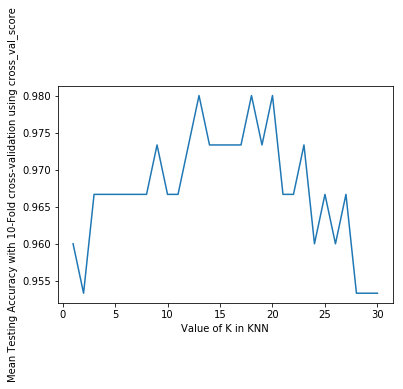

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, mean_scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Mean Testing Accuracy with 10-Fold cross-validation using cross_val_score')

In [47]:
#
# KFold for Model Selection
#
knn = KNeighborsClassifier(n_neighbors = 20)
print cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy').mean()

0.98


In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()

0.953333333333


In [53]:
#
#KFold for feature selection
#
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [54]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = 0)

In [55]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]
y = data['Sales']

In [61]:
#10 fold cross validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10, scoring='neg_mean_squared_error')
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [60]:
mse_scores = -scores
print mse_scores

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [62]:
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [64]:
print rmse_scores.mean()

1.69135317081


In [67]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print np.sqrt(-cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error' )).mean()

1.67967484191
